# HomeTask 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
conf_pres = np.array([5,10,15,20])
fail_pres = np.array([95.33, 118.53, 135.16, 149.13])
pres_arr = np.stack((conf_pres, fail_pres), axis = 1)

df = pd.DataFrame(pres_arr, columns=['sigma_3','sigma_F'])
df

,sigma_3,sigma_F
0,5.0,95.33
1,10.0,118.53
2,15.0,135.16
3,20.0,149.13


In [184]:
df['sigma_1'] = df['sigma_3']+df['sigma_F']

In [185]:
df

,sigma_3,sigma_F,sigma_1
0,5.0,95.33,100.33
1,10.0,118.53,128.53
2,15.0,135.16,150.16
3,20.0,149.13,169.13


In [186]:
df['center'] = (df['sigma_1'] + df['sigma_3'])*0.5
df['radius'] = (df['sigma_1'] - df['sigma_3'])*0.5

In [187]:
df

,sigma_3,sigma_F,sigma_1,center,radius
0,5.0,95.33,100.33,52.665,47.665
1,10.0,118.53,128.53,69.265,59.265
2,15.0,135.16,150.16,82.580,67.580
3,20.0,149.13,169.13,94.565,74.565


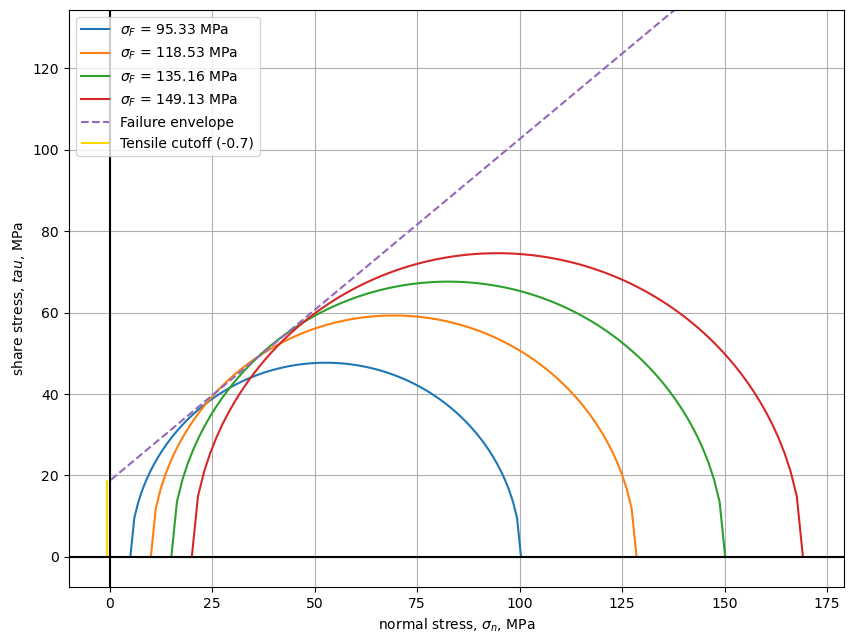

In [196]:
angles = np.linspace(1,180,1810)
tensile_cutoff = -0.7
intercept, slope = 18.7, 40

x_line = tensile_cutoff + angles/180 * (df['sigma_1'].max() - tensile_cutoff)
y_line = intercept + x_line * np.tan(2*np.pi/360* slope)

x_arr = []
y_arr = []
plt.figure(figsize=(10,7.5))
for i in range(4):
    x = np.linspace(df.sigma_3[i], df.sigma_1[i], 100)
    x_arr.append(x)
    y = np.sqrt(np.power(df.radius[i], 2) - np.power((x - df.center[i]),2))
    y_arr.append(y)
    plt.plot(x,y, label = f'$\sigma_F$ = {df.sigma_F[i]} MPa')
plt.plot(x_line, y_line, '--', label = 'Failure envelope')
plt.vlines(tensile_cutoff, 0, y_line[0], colors= 'gold', label = f'Tensile cutoff ({tensile_cutoff})')
ax = plt.gca()    
plt.grid()
ax.axhline(y=0, color='k')  
ax.axvline(x=0, color='k')
plt.xlim(-10,df['sigma_1'].max()+10)
plt.ylim(-10*0.75,(df['sigma_1'].max()+10)*0.75 )
plt.ylabel('share stress, $tau$, MPa')
plt.xlabel('normal stress, $\sigma_n$, MPa')
plt.legend()
plt.savefig('Mohr_fig.png',dpi=500)
plt.show()

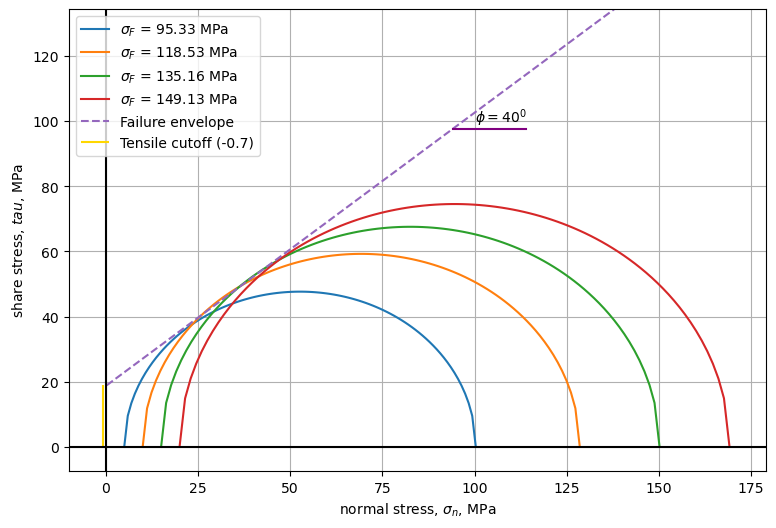

In [197]:
#input data
angles = np.linspace(1,180,181)
tensile_cutoff = -0.7
intercept, slope = 18.7, 40

#failure envelop calculation 
x_line = tensile_cutoff + angles/180 * (df['sigma_1'].max() - tensile_cutoff)
y_line = intercept + x_line * np.tan(2*np.pi/360* slope)

x_arr = []
y_arr = []
plt.figure(figsize=(9,6))
for i in range(4):
    x = np.linspace(df.sigma_3[i], df.sigma_1[i], 100)
    x_arr.append(x)
    y = np.sqrt(np.power(df.radius[i], 2) - np.power((x - df.center[i]),2))
    y_arr.append(y)
    plt.plot(x,y, label = f'$\sigma_F$ = {df.sigma_F[i]} MPa')
plt.plot(x_line, y_line, '--', label = 'Failure envelope')

phi_coord = 100
plt.plot([x_line[phi_coord],x_line[phi_coord]+20], [y_line[phi_coord],  y_line[phi_coord]],
         '-', color = 'purple')
plt.text(x_line[phi_coord]+6, y_line[phi_coord]+2., f'$\phi = {slope}^0$')
#tensile cutoff
plt.vlines(tensile_cutoff, 0, y_line[0], colors= 'gold', label = f'Tensile cutoff ({tensile_cutoff})')
#axes
ax = plt.gca()
plt.grid()
ax.axhline(y=0, color='k')  
ax.axvline(x=0, color='k')
#axes limits
plt.xlim(-10,df['sigma_1'].max()+10)
plt.ylim(-10*0.75,(df['sigma_1'].max()+10)*0.75 )
plt.ylabel('share stress, $tau$, MPa')
plt.xlabel('normal stress, $\sigma_n$, MPa')
plt.savefig('Mohr_fig_phi.png',dpi=500)
plt.legend()
plt.show()

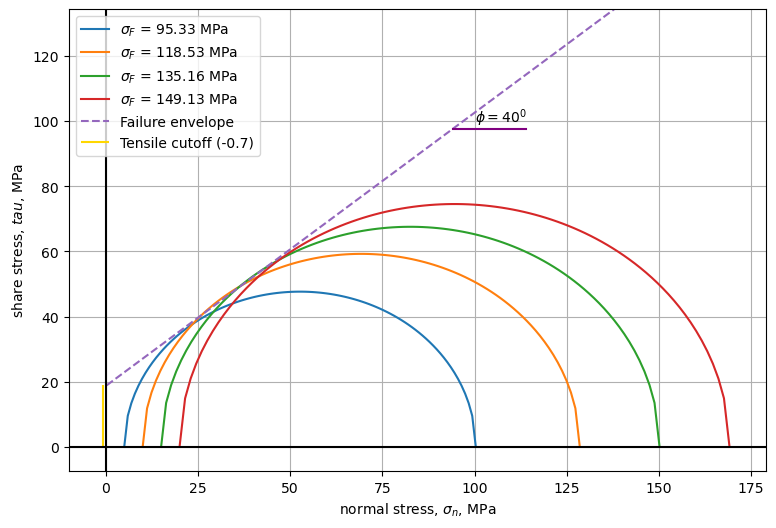

In [190]:
#input data
angles = np.linspace(1,180,181)
tensile_cutoff = -0.7
intercept, slope = 18.7, 40

#failure envelop calculation 
x_line = tensile_cutoff + angles/180 * (df['sigma_1'].max() - tensile_cutoff)
y_line = intercept + x_line * np.tan(2*np.pi/360* slope)

x_arr = []
y_arr = []
plt.figure(figsize=(9,6))
for i in range(4):
    x = np.linspace(df.sigma_3[i], df.sigma_1[i], 100)
    x_arr.append(x)
    y = np.sqrt(np.power(df.radius[i], 2) - np.power((x - df.center[i]),2))
    y_arr.append(y)
    plt.plot(x,y, label = f'$\sigma_F$ = {df.sigma_F[i]} MPa')
plt.plot(x_line, y_line, '--', label = 'Failure envelope')

phi_coord = 100
plt.plot([x_line[phi_coord],x_line[phi_coord]+20], [y_line[phi_coord],  y_line[phi_coord]],
         '-', color = 'purple')
plt.text(x_line[phi_coord]+6, y_line[phi_coord]+2., f'$\phi = {slope}^0$')
#tensile cutoff
plt.vlines(tensile_cutoff, 0, y_line[0], colors= 'gold', label = f'Tensile cutoff ({tensile_cutoff})')
#axes
ax = plt.gca()
plt.grid()
ax.axhline(y=0, color='k')  
ax.axvline(x=0, color='k')
#axes limits
plt.xlim(-10,df['sigma_1'].max()+10)
plt.ylim(-10*0.75,(df['sigma_1'].max()+10)*0.75 )
plt.ylabel('share stress, $tau$, MPa')
plt.xlabel('normal stress, $\sigma_n$, MPa')
plt.legend()
plt.show()

In [199]:
47/0.9+20

72.22222222222223